# Выбор локации для скважины

<div class="alert alert-info">
Привет! Меня зовут Никита Мишин и я буду твоим ревьюером по этому проекты.
Для простоты предлагаю общение на 'ты'. Буду предполагать, что ты не против:) 
Если более предпочтительно обращение на 'Вы', пиши, не стесняйся.
Также если будут возникать вопросы, аналогично, пиши:)

Предлагаю работать в известном тебе итеративном формате.
Итерация состоит в моей проверке твоего решения. 
После решения могут остаться какие-то недочеты, которые я попрошу тебя устранить, ты их исправляешь и я проверяю твои решения.
    Оставленные мною комментарии могут быть разного вида:
   
    - зеленый: элегантные решения, которые тебе стоит запомнит и в дальнейшем взять на вооружение:) 
    
    - желтый: сигнал о том, что есть некритичная вещь(не всегда ошибка), что нужно точно поправить в следующей работе, даже желательно в этой (полезно, в первую очередь, для тебя:) ).Также это рекомендации на будущее    

    - красный: недочет, который нужно исправить в этой работе, для того, чтобы она была принята
    
    - синий: полезная информация, доп ресурсы, "вопросы на подумать"

Также попрошу не удалять мои комментарии:) <a class="tocSkip">
</div>

**Проект**

Нам надо оценить рентабельность скважин одной отечественной кампании. У нас есть данные по 3 месторождениям, в каждом — три скважины. Нам надо оценить, есть ли риск убыточности у этих месторождений. Для оценки привлечём модель линейной регрессии — её проще интерпретировать.

Применим метод bootrap, чтобы на небольшой выборке вытянуть лучший вариант. Нам предстоит также
высчитать доверительный интервал.


**Я почти довольна, но не успеваю написать введение. Вопросы отправила куратору. Мне нравится использовать numpy, но это происходит только в итоге гуглежа. С библиотекой познакомилась, как говорится, в поле.**

<div class="alert alert-success">

<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Ок, разберемся!
</div>

<div class="alert alert-success">

<h1>Комментарий ревьюера v4 <a class="tocSkip"></a></h1>
Главное, что смогли разобраться:)
</div>

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import matplotlib.mlab as mlab

In [3]:
data0 = pd.read_csv('/datasets/geo_data_0.csv')
data1 = pd.read_csv('/datasets/geo_data_1.csv')
data2 = pd.read_csv('/datasets/geo_data_2.csv')

<div class="alert alert-warning">

<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
А зачем это вообще?</div>
<div class="alert alert-info">

<h1>V2 ответ студентки <a class="tocSkip"></a></h1>
да, это я пыталась ввести регион в таблицу зачем-то.
</div>

In [4]:
df = [data0.drop('id', axis=1), data1.drop('id', axis=1), data2.drop('id', axis=1)]

In [5]:
df

[             f0        f1        f2     product
 0      0.705745 -0.497823  1.221170  105.280062
 1      1.334711 -0.340164  4.365080   73.037750
 2      1.022732  0.151990  1.419926   85.265647
 3     -0.032172  0.139033  2.978566  168.620776
 4      1.988431  0.155413  4.751769  154.036647
 ...         ...       ...       ...         ...
 99995  0.971957  0.370953  6.075346  110.744026
 99996  1.392429 -0.382606  1.273912  122.346843
 99997  1.029585  0.018787 -1.348308   64.375443
 99998  0.998163 -0.528582  1.583869   74.040764
 99999  1.764754 -0.266417  5.722849  149.633246
 
 [100000 rows x 4 columns],
               f0         f1        f2     product
 0     -15.001348  -8.276000 -0.005876    3.179103
 1      14.272088  -3.475083  0.999183   26.953261
 2       6.263187  -5.948386  5.001160  134.766305
 3     -13.081196 -11.506057  4.999415  137.945408
 4      12.702195  -8.147433  5.004363  134.766305
 ...          ...        ...       ...         ...
 99995   9.535637  -6.878

<div class="alert alert-success">

<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Да,идентификаторы бесполезны для моделей
</div>

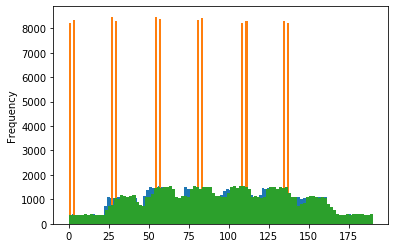

In [6]:
for d in df:
    bins = 100
    d['product'].plot.hist(['product'], bins = bins)

<div class="alert alert-info">

<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Не забывай, что данные синтетические</div>
<div class="alert alert-info">

<h1>V2 student <a class="tocSkip"></a></h1>
А, хорошо. Я уже думала, что аномалии.</div>

In [7]:
for d in df:
    d_dup = d[d.duplicated()]
    print(d_dup.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
f0         0 non-null float64
f1         0 non-null float64
f2         0 non-null float64
product    0 non-null float64
dtypes: float64(4)
memory usage: 0.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
f0         0 non-null float64
f1         0 non-null float64
f2         0 non-null float64
product    0 non-null float64
dtypes: float64(4)
memory usage: 0.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
f0         0 non-null float64
f1         0 non-null float64
f2         0 non-null float64
product    0 non-null float64
dtypes: float64(4)
memory usage: 0.0 bytes
None


<div class="alert alert-info">

<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Полезно было бы еще посмотреть на распределение других признаков, проверить на дубликаты и  вывести матрицу корреляций
</div>

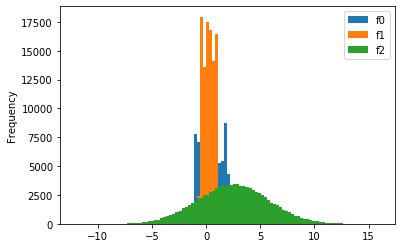

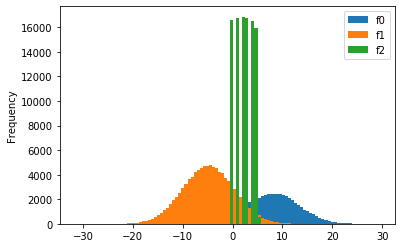

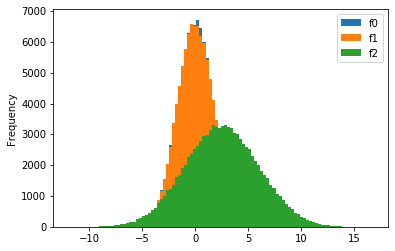

In [8]:
fs = [['f0', 'f1', 'f2']]
for d in df:
    for f in fs:
        bins = 100
        d[f].plot.hist([f], bins = bins)

Ощущение, что уже глядя на эти графики, можно было бы сделать выводы про доходность всего. Но не будем доверяться ощущениям.
1 месторождение: максимальные выбросы вокруг нуля.
2 месторождение (то есть датасет под номером 1): максимальные выбросы чуть правее — м.б. это наш регион.
3 месторождение: Максимум — в негативе.

In [9]:
#for d in df:
    #for f in fs:
        #dd = pd.DataFrame(columns=[f])
        #pd.plotting.scatter_matrix(d, alpha=0.2)
#Безумно выглядит

## Обучение и проверка модели

In [10]:
samples_target = []
samples_predictions = []

In [11]:
#Я поняла свою ошибку: пыталась каждый раз вызывать цикл
for region in range(len(df)):
    data = df[region]
    features = data.drop('product', axis=1)
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size = 0.25, random_state = 12345)
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    samples_target.append(target_valid.reset_index(drop=True))
    samples_predictions.append(pd.Series(predictions))
    mean_product = target.mean()
    rmse = mean_squared_error(target_valid, predictions) ** 0.5
    print(region, 'средний продукт', mean_product, 'среднеквадратичная ошибка', rmse)
    

0 средний продукт 92.50000000000001 среднеквадратичная ошибка 37.5794217150813
1 средний продукт 68.82500000000002 среднеквадратичная ошибка 0.893099286775616
2 средний продукт 95.00000000000004 среднеквадратичная ошибка 40.02970873393434


<div class="alert alert-info">

<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Все импорты лучше располагать в начале проекта
</div>

In [12]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

## Подготовка к расчёту прибыли

In [13]:
budget_region = 10000
points = 200
price_per_unit = 0.45
risk = .025

In [14]:
def profit(target, predictions):
    predictions_rating = predictions.sort_values(ascending=False).head(200)
    sample_points = target[predictions_rating.index]
    product = sample_points.sum()
    revenue = product * price_per_unit
    return revenue - budget_region
    

<div class="alert alert-danger">

<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Что такое budget?+ ты же предикшины уже обернула в серию ранее)</div>
<div class="alert alert-info">

<div class="alert alert-info">
<h1>V2 <a class="tocSkip"></a></h1>
Это остатки предыдущего варианта(( Ctrl+Z, видимо, нажала
</div>

<div class="alert alert-info">
<h1>Комментарий ревьюера v2 <a class="tocSkip"></a></h1>
Бывает:)</div>

In [15]:
total_per_unit = budget_region / points
no_profit = total_per_unit / price_per_unit
print('Минимальное среднее количество', no_profit)

Минимальное среднее количество 111.11111111111111


## Расчёт прибыли и рисков 

Гипотеза: регион под номером 1 (data...1) — подходящий для бурения скважин с точки зрения бизнеса.

In [16]:
sample_size = 500
boot_size = 1000
r = len(df)
for region in range(r):
    state = np.random.RandomState(12345)
    concatenated_target, concatenated_predictions =  samples_target[region],samples_predictions[region]    
    profit_values = []
    for p in range(boot_size):
        target_sample = concatenated_target.sample(sample_size, replace=True,random_state = state)
        predictions_sample = concatenated_predictions[target_sample.index]
        profit_values.append(profit(target_sample, predictions_sample))
    profit_values = pd.Series(profit_values)
    mean_profit = profit_values.mean()
    conf_int = (profit_values.quantile(0.025), profit_values.quantile(0.975))
    neg_profit = ((profit_values < 0).mean() * 100)
    profit_values.describe()
    print('РЕГИОН', region, 'ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ', conf_int)

    print('РИСКИ', neg_profit)

    print('СРЕДНИЙ ДОХОД', mean_profit)

РЕГИОН 0 ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ (12.948331135114495, 1231.1636057914995)
РИСКИ 2.0
СРЕДНИЙ ДОХОД 600.7352442611656
РЕГИОН 1 ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ (157.98848131991443, 1197.6415874631525)
РИСКИ 0.3
СРЕДНИЙ ДОХОД 665.2410582210725
РЕГИОН 2 ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ (-12.218495237292284, 1230.6444739413173)
РИСКИ 3.0
СРЕДНИЙ ДОХОД 615.5597228409681


<div class="alert alert-danger">

<h1>Комментарий ревьюера v3<a class="tocSkip"></a></h1>
немного напутала, примерно так надо
    
    for region in range(3):
        state = np.random.RandomState(42)
        concatenated_target, concatenated_predictions =  samples_target[region],samples_predictions[region]    
        profit_values = []
        for p in range(boot_size):
            target_sample = concatenated_target.sample(sample_size, replace=True,random_state = state)
            predictions_sample = concatenated_predictions[target_sample.index]
            profit_values.append(profit(target_sample, predictions_sample))
        profit_values = pd.Series(profit_values)
        mean_profit = profit_values.mean()
        conf_int = (profit_values.quantile(0.025), profit_values.quantile(0.975))
        neg_profit = ((profit_values < 0).mean() * 100)
        profit_values.describe()
        
        print(conf_int)
        
        print(neg_profit)
        
        print(mean_profit)
        
        print(profit_values.describe())


</div>

Text(0.5, 1.0, 'Распределение дохода')

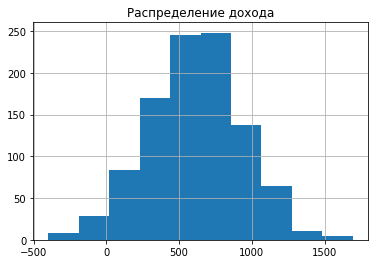

In [17]:
profit_values.hist()
plt.pyplot.title('Распределение дохода')
#Скошен справо

<div class="alert alert-danger">

<h1>Комментарий ревьюера v2<a class="tocSkip"></a></h1>
Уже лучше, но у тебя что-то тут с циклами не так. Кажется, самйы внешний лишний:) И никакого принта не стоит результатов:)</div>

<div class="alert alert-danger">

<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
У тебя итерирование идет по индесам: for i in range(len(df)) -> i = 0,1 .... len(df)-1
    
И тебе надо  target = samples_target[i]...

Аналогично с predicitons. Тогда все должно заработать;)
</div>

<div class="alert alert-info">

<h1>Комментарий ревьюера  v2<a class="tocSkip"></a></h1>
Круто было бы еще визуализировать распределение прибыли;)
</div>

<div class="alert alert-info">

<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
ошибки и как править указал:) Жду исправлений;)</div>

**Выводы**  Выберем регион под номером — 1. Риск оценён в 0,3%. Средний доход выше остальных. Доверительный интервал уже.

<div class="alert alert-success">

<h1>Комментарий ревьюера v4 <a class="tocSkip"></a></h1>
Успех! Нефтяники озолотятся!
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован

<div class="alert alert-success">

<h1>Комментарий ревьюера v4 <a class="tocSkip"></a></h1>
Удачи в следующих проектах!
</div>